<a href="https://colab.research.google.com/github/diegoednaldo/LH_CD_DIEGOEDNALDO/blob/main/LH_CD_DIEGOEDNALDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Cientista de Dados**


## **Descrição do desafio**
Você foi alocado(a) em um time da Indicium que está trabalhando atualmente
junto a um cliente no processo de criação de uma plataforma de aluguéis
temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de
precificação, pediu para que a Indicium fizesse uma análise exploratória dos d
de seu maior concorrente, assim como um teste de validação de um modelo
preditivo.

## **Análise exploratória dos dados**

### **Preparação do ambiente**

Começaremos importando os pacotes necessários.

In [112]:
# biblitecas para análise de dados
import pandas as pd
import numpy as np
from collections import Counter

# Bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para processamento de linguagem natural
import spacy

# Datetime
from datetime import datetime as dt

# Pacotes de machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import xgboost as xgb
from xgboost import DMatrix

# Biblioteca para exportar e carregar arquivo pickle
import joblib

nlp = spacy.load("en_core_web_sm")

Agora vamos ler os dados em um DataFrame.

In [113]:
df = pd.read_csv('teste_indicium_precificacao.csv')

### **Explorando o conjunto de dados**
Antes de executar qualquer análise, primeiro veremos como é o nosso conjunto de dados. Estas são as variáveis ​​que ele contém:

* id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo \
* nome - Representa o nome do anúncio \
* host_id - Representa o id do usuário que hospedou o anúncio \
* host_name – Contém o nome do usuário que hospedou o anúncio \
* bairro_group - Contém o nome do bairro onde o anúncio está localizado \
* bairro - Contém o nome da área onde o anúncio está localizado \
* latitude - Contém a latitude do local \
* longitude - Contém a longitude do local \
* room_type – Contém o tipo de espaço de cada anúncio \
* price - Contém o preço por noite em dólares listado pelo anfitrião \
* minimo_noites - Contém o número mínimo de noites que o usuário deve reservar \
* numero_de_reviews - Contém o número de comentários dados a cada listagem \
* ultima_review - Contém a data da última revisão dada à listagem \
* reviews_por_mes - Contém o número de avaliações fornecidas por mês \
* calculado_host_listings_count - Contém a quantidade de listagem por host \
* disponibilidade_365 - Contém o número de dias em que o anúncio está disponível
para reserva


In [114]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Usando o `info` método, poderemos ver o tamanho do conjunto de dados, bem como algumas informações sobre cada coluna, como o número de valores não nulos e o tipo de dados que ele contém.




In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Agora podemos ver a quantidade de dados que temos: 48894 linhas e 16 colunas.

Observe que algumas colunas contêm dados nulos. Isso geralmente não é bom. Vamos investigar se o número de valores nulos é significativo e então decidir o que fazer com ele.

In [116]:
(round(df.isnull().sum() / df.shape[0] * 100, 2)).sort_values(ascending=False)

,0
ultima_review,20.56
reviews_por_mes,20.56
host_name,0.04
nome,0.03
id,0.00
host_id,0.00
bairro_group,0.00
bairro,0.00
latitude,0.00
longitude,0.00


Boas notícias! Apenas as colunas `last_review` e `reviews_per_month` contêm uma quantidade significativa de valores nulos. Como ambas as colunas não são o foco da nossa análise, isso não será um problema. Mais adiante neste projeto, nós as removeremos.

As colunas `name` e `host_name` também contêm valores nulos, mas isso também não afetará nosso projeto, já que não estamos realizando nenhuma análise nelas. Além disso, o número de valores nulos é irrelevante.

### **Distribuição de Variáveis**
Agora, traçaremos alguns histogramas para ver a distribuição de cada variável e começar a procurar por valores discrepantes.

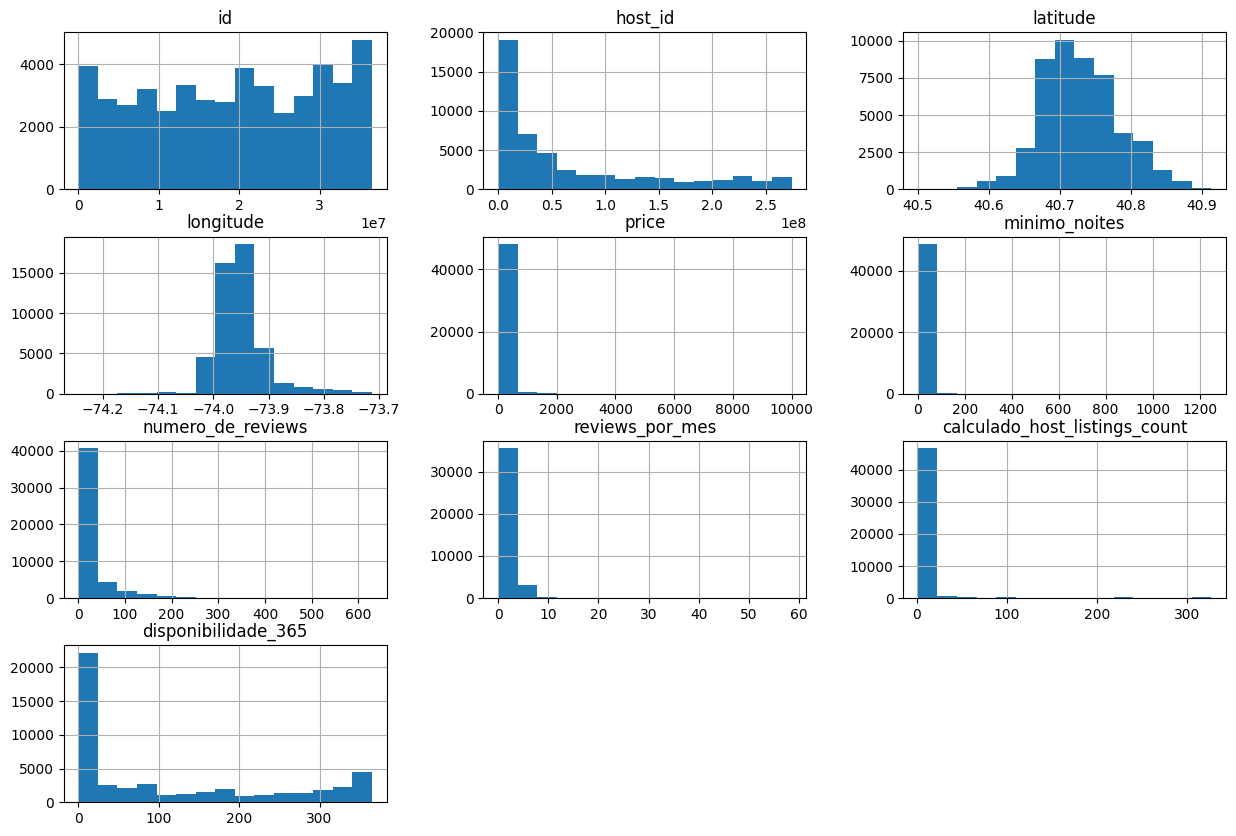

In [117]:
df.hist(bins=15, figsize=(15,10));

Observando os histogramas, podemos notar que algumas variáveis ​​importantes como `price` e `minimum_nights` nossa mal distribuída. Para identificar melhor esses problemas, vamos ver mais estatísticas sobre o conjunto de dados usando o `describe` método.

In [118]:
df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
    'calculado_host_listings_count', 'disponibilidade_365']].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


É fácil ver que alguns valores não fazem sentido. Vamos olhar para a coluna `price`, por exemplo. O preço médio é \$152,72 e 75% desses preços estão abaixo de \$175, no entanto, o preço máximo é \$10.000. Além disso, o valor mínimo é $0.

O mesmo acontece na coluna `minimo_noites`, onde o valor máximo é 1.250! Como alguém pode esperar ter seu lugar reservado se o visitante tem que ficar pelo menos três anos e meio? Não faz sentido algum!

Valores como esses distorcem a realidade e qualquer análise que tentamos fazer. Agora teremos que lidar com eles.

### **Removendo Outliers**
Vamos traçar boxplots para cada uma dessas colunas para que possamos analisar mais de perto sua distribuição.

Além disso, vamos ver quantas e quais porcentagens de preços são iguais a US\$ 0 e acima de US$ 500,00 e as porcentagens de noites mínimas que são superiores a 30 noites.

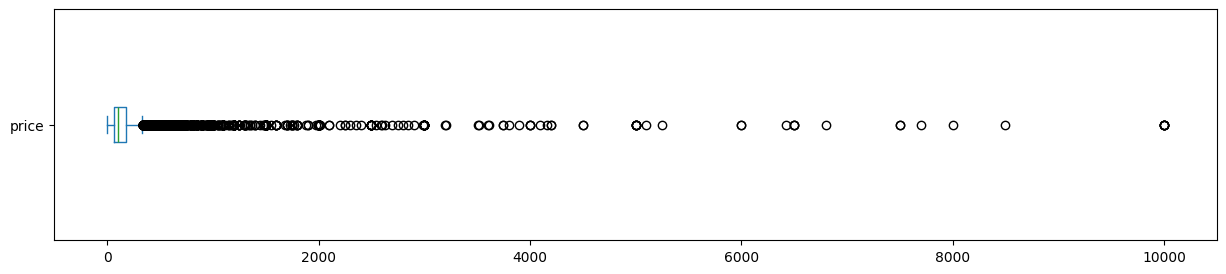

Valores acima de $500,00: 
1044
2.1352%


Valores iguais a $0: 
11
0.0225%


In [119]:
# Exibindo o boxplot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculando o número e a porcentagem de preços iguais a $0 e acima de $500,00
print('Valores acima de $500,00: ')
print(len(df[df['price'] > 500]))
print('{:.4f}%'.format((len(df[df['price'] > 500]) / df.shape[0]) * 100))
print('\n')
print('Valores iguais a $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

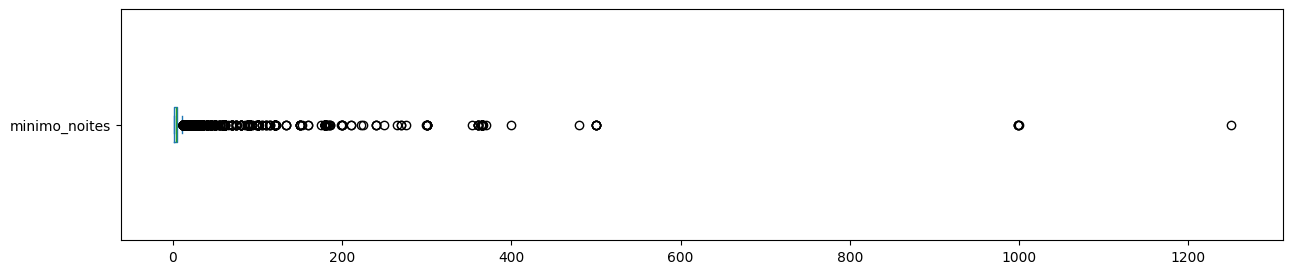

Valores acima de 30 diárias: 
747
1.5278%


In [120]:
# Exibindo o boxplot
df['minimo_noites'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculando o número e a porcentagem de quartos com o valor mínimo de noites acima de 30
print('Valores acima de 30 diárias: ')
print(len(df[df['minimo_noites'] > 30]))
print('{:.4f}%'.format((len(df[df['minimo_noites'] > 30]) / df.shape[0]) * 100))

Podemos ver que apenas 2,13% da coluna `price` está acima de US$ 500,00 e apenas 1,52% dos valores na coluna `minimo_noites` estão acima de 30. Temos 11 elementos com preço zero também.

Levando em consideração, como dissemos anteriormente, que 75% dos valores dessas colunas estão abaixo de \$175,00 e 5 noites, respectivamente, é razoável perder aproximadamente 3,8% dos dados para torná-los mais realistas. Portanto, criaremos um novo dataframe, ny_clean, que contém apenas as linhas nas quais o preço é maior que \$0 e menor que \$500, e o mínimo de noites não é maior que 30.

Além disso, provavelmente algumas colunas atendem a ambos os requisitos, o que significa que estamos perdendo ainda menos de 3,8% do conjunto de dados.

Depois de criar o novo dataframe, removeremos as colunas `reviews_por_mes` e `last_review` como dissemos anteriormente no projeto.

Por fim, vamos ver se os histogramas parecem melhores.

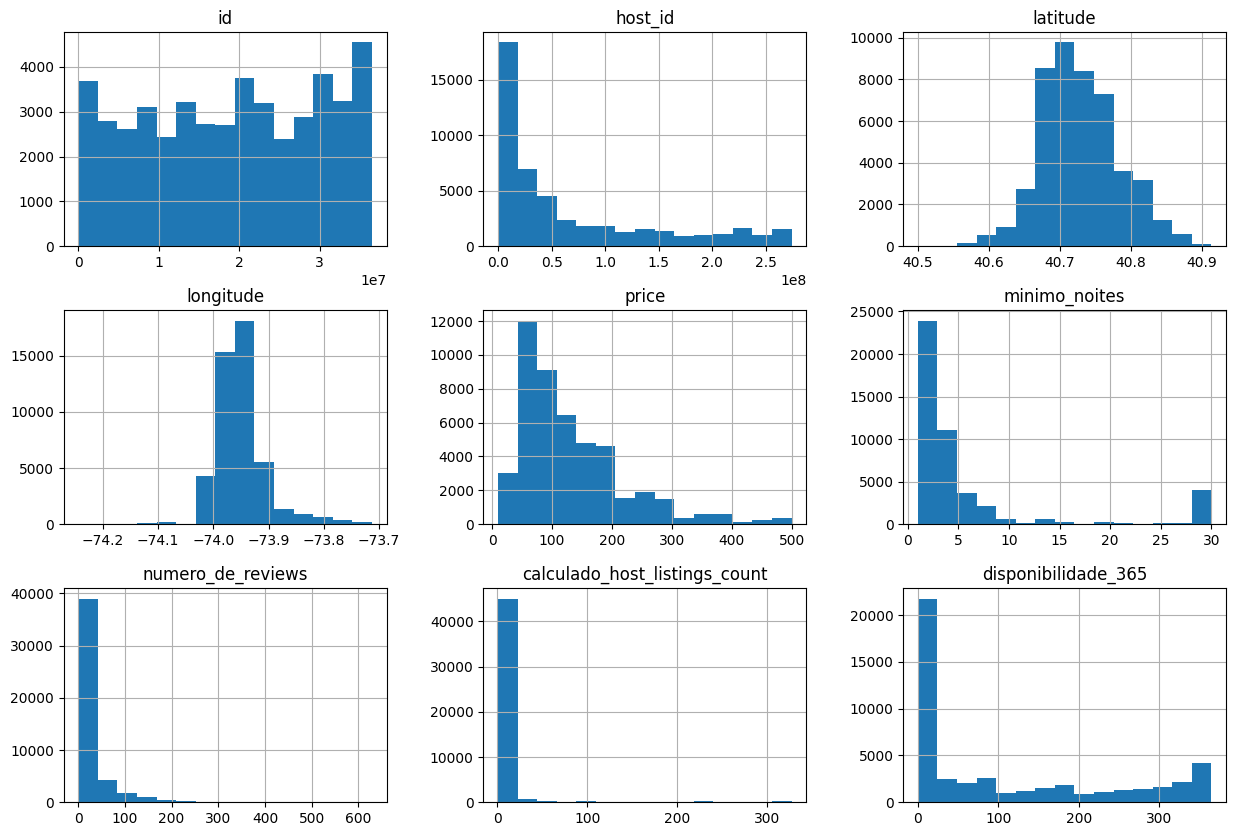

In [121]:
# Selecionando as linhas que atendem aos requisitos estabelecidos
df_clean = df[(df['price'] <= 500) & (df['price'] > 0) & (df['minimo_noites'] <= 30)].copy()

# Removendo as colunas
df_clean.drop(['reviews_por_mes', 'ultima_review'], axis=1, inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# Plotando os histogramas novamente
df_clean.hist(bins=15, figsize=(15,10));

Ainda podemos ver, por exemplo, que os preços mais comuns ainda estão abaixo de US$ 100,00, mas a distribuição é muito mais realista agora.

### **Análise**
Agora vamos responder algumas perguntas e tentar obter alguns insights do conjunto de dados. Para isso, usaremos frequentemente os métodos `value_counts` e `groupby`. Essas são duas ferramentas muito poderosas que nos permitem rapidamente extrair algumas informações úteis de uma grande quantidade de dados.

Primeiro, vamos ver que `room_type` é mais alugado em Nova York.

room_type
Entire home/apt    24029
Private room       21962
Shared room         1133
Name: count, dtype: int64


room_type
Entire home/apt    50.99
Private room       46.60
Shared room         2.40
Name: proportion, dtype: float64




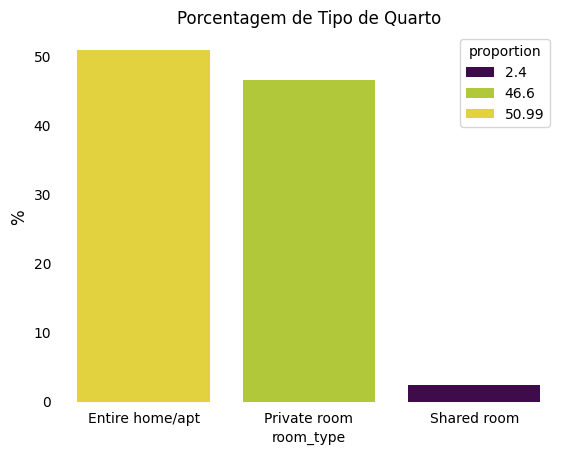

In [89]:
# Calculando o número de quartos para cada tipo de quarto
room_type = df_clean['room_type'].value_counts().sort_values(ascending=False)

# Calculando a porcentagem de quartos para cada tipo de quarto
room_type_pct = round(df_clean['room_type'].value_counts(normalize=True) * 100, 2)

# Exibindo os resultados
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotando a porcentagem de quartos para cada tipo de quarto
ax = sns.barplot(x=room_type_pct.index, y=room_type_pct, hue=room_type_pct, palette="viridis")
ax.set_title('Porcentagem de Tipo de Quarto')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Apartamentos inteiros e quartos privados dominam o mercado na cidade de Nova York. Quartos compartilhados são basicamente inexistentes.

Agora vamos ver os preços médios para cada um desses tipos de quarto.

room_type
Entire home/apt    180.06
Private room        81.86
Shared room         63.78
Name: price, dtype: float64




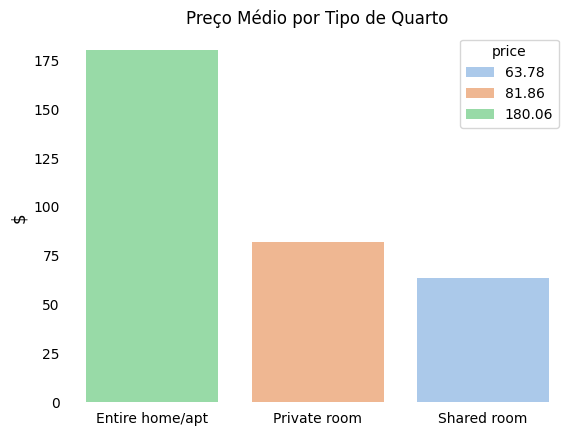

In [90]:
# Calculando o preço médio por tipo de quarto
type_price = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Exibindo os resultados
print(type_price)
print('\n')

# Plotando o preço médio por tipo de quarto
ax = sns.barplot(x=type_price.index, y=type_price, hue=type_price, palette='pastel')
ax.set_title('Preço Médio por Tipo de Quarto')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Casa/Apartamento inteiro são o tipo mais caro, em média. E quartos privativos são mais caros do que quartos compartilhados.

## **Entregas soliticadas pela equipe da Indicium**

### **Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

Para responder essa pergunta vamos começar a investigar preços em diferentes regiões da cidade. Para isso, usaremos a coluna `bairro_group`em vez da coluna `bairro` porque ela divide a cidade em cinco regiões principais em vez de vários bairros pequenos.

bairro_group
Manhattan        163.30
Brooklyn         112.70
Queens            93.03
Staten Island     91.43
Bronx             81.98
Name: price, dtype: float64




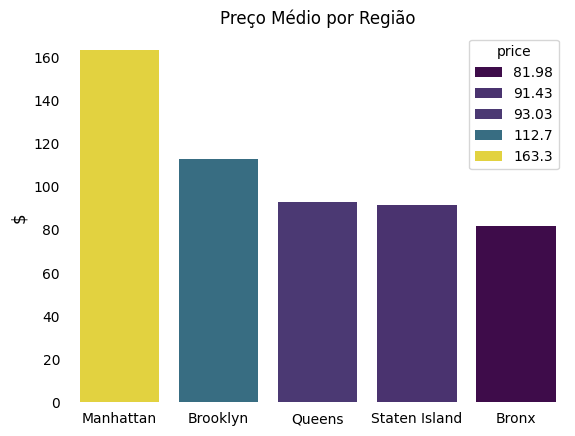

In [91]:
# Calculando o preço médio por região
price_region = round(df_clean.groupby('bairro_group').price.mean().sort_values(ascending=False), 2)

# Exibindo os resultados
print(price_region)
print('\n')


ax = sns.barplot(x=price_region.index, y=price_region, hue=price_region, palette='viridis')
ax.set_title('Preço Médio por Região')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Agora vamos calcular a média de preço para o tipo específico de quarto 'Entire home/apt' que é o desejado pelo cliente.

bairro_group
Manhattan        204.50
Brooklyn         160.13
Queens           138.87
Staten Island    125.43
Bronx            123.75
Name: price, dtype: float64




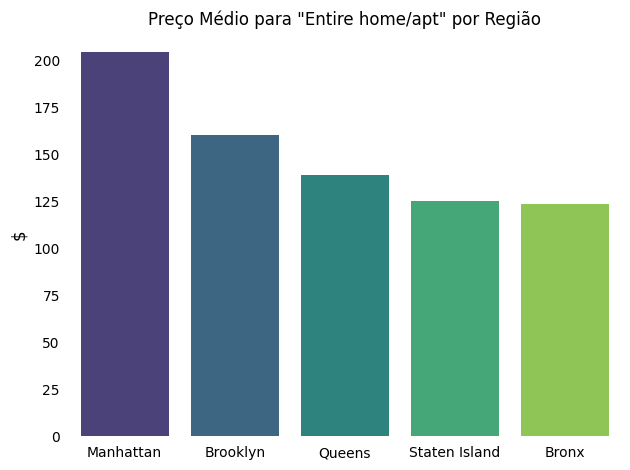

In [92]:
# Filtrando para considerar apenas o tipo 'Entire home/apt'
entire_home_apt_df = df_clean[df_clean['room_type'] == 'Entire home/apt']

# Calculando a média de preço do tipo 'Entire home/apt' por região
price_entire_home_apt_region = round(entire_home_apt_df.groupby('bairro_group').price.mean().sort_values(ascending=False), 2)

# Exibindo os resultados
print(price_entire_home_apt_region)
print('\n')

# Plotando a média de preço para 'Entire home/apt' por região
ax = sns.barplot(x=price_entire_home_apt_region.index, y=price_entire_home_apt_region, hue=price_entire_home_apt_region.index, palette='viridis', legend=False)
ax.set_title('Preço Médio para "Entire home/apt" por Região')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


Manhattan é consideravelmente mais cara que o resto da cidade, o que faz todo o sentido, já que é a parte mais rica e densamente povoada de Nova York.

Agora, vamos ver quantos quartos estão disponíveis em cada região.

bairro_group
Manhattan        20484
Brooklyn         19622
Queens            5585
Bronx             1070
Staten Island      363
Name: count, dtype: int64


bairro_group
Manhattan        43.47
Brooklyn         41.64
Queens           11.85
Bronx             2.27
Staten Island     0.77
Name: count, dtype: float64




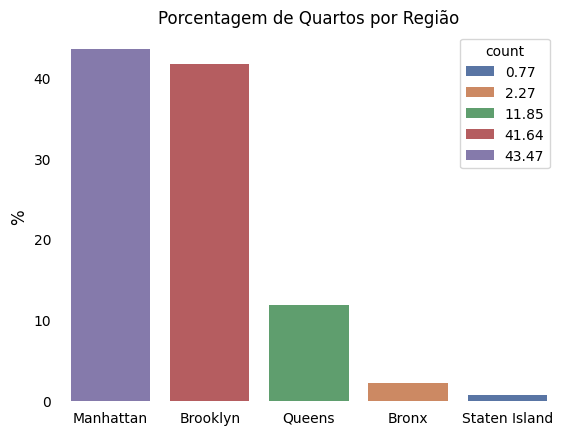

In [93]:
# Calculando o número de quartos por região
room_regions = df_clean['bairro_group'].value_counts().sort_values(ascending=False)

# Calculando a porcentagem de quartos por região
room_regions_pct = round(df_clean['bairro_group'].value_counts().sort_values(ascending=False) / len(df_clean) * 100, 2)

# Exibindo os resultados
print(room_regions)
print('\n')
print(room_regions_pct)
print('\n')

# Plotando a porcentagem de quartos por região
ax = sns.barplot(x=room_regions_pct.index, y=room_regions_pct, hue=room_regions_pct, palette='deep')
ax.set_title('Porcentagem de Quartos por Região')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Precebe-se que Manhattan e Brooklyn tem a maior quantidade dos quartos disponíveis.

Quantidade de quartos disponíveis por tipo de quarto (no caso, 'Entire home/apt')

Quantidade de 'Entire home/apt' por Região:
bairro_group
Manhattan        12212
Brooklyn          9222
Queens            2061
Bronx              366
Staten Island      168
Name: count, dtype: int64




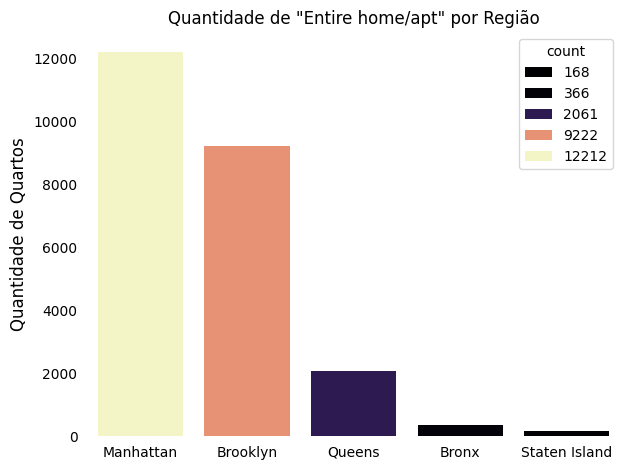

In [94]:
# Filtrando a base para considerar apenas o tipo 'Entire home/apt'
entire_home_apt = df_clean[df_clean['room_type'] == 'Entire home/apt']

# Calculando a quantidade de 'Entire home/apt' disponíveis por região
entire_home_apt_regions = entire_home_apt['bairro_group'].value_counts().sort_values(ascending=False)

# Exibindo a quantidade de 'Entire home/apt' por região
print("Quantidade de 'Entire home/apt' por Região:")
print(entire_home_apt_regions)
print('\n')

# Plotando a quantidade de 'Entire home/apt' por região
ax = sns.barplot(x=entire_home_apt_regions.index, y=entire_home_apt_regions, hue=entire_home_apt_regions, palette='magma')
ax.set_title('Quantidade de "Entire home/apt" por Região')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('Quantidade de Quartos', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


Nota-se que em mais de 80% dos quartos do tipo solicitado pelo cliente estão em Manhattan e no Brooklyn.

Logo, podemos cruzar as duas informações e ver a relação do total de quartos para o tipo específico 'Entire home/apt', podemos calcular a porcentagem do tipo 'Entire home/apt' em relação ao total de quartos por região.

Porcentagem de 'Entire home/apt' por Região em relação ao total de quartos:
bairro_group
Manhattan        59.617262
Brooklyn         46.998267
Queens           36.902417
Bronx            34.205607
Staten Island    46.280992
Name: count, dtype: float64




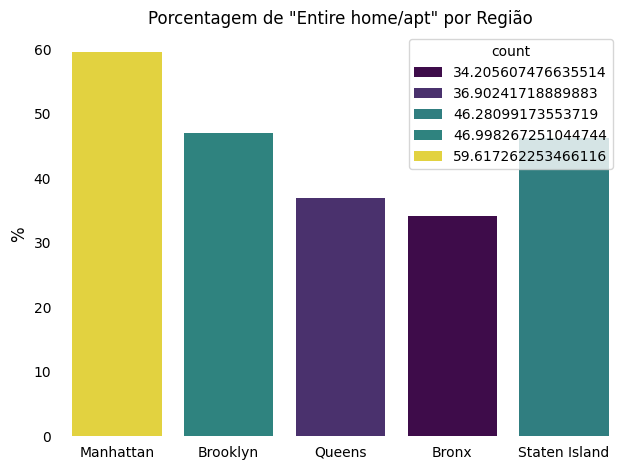

In [95]:
# Calculando a quantidade total de quartos por região
room_regions = df_clean['bairro_group'].value_counts().sort_values(ascending=False)

# Filtrando a base para considerar apenas o tipo 'Entire home/apt'
entire_home_apt = df_clean[df_clean['room_type'] == 'Entire home/apt']

# Calculando a quantidade de 'Entire home/apt' disponíveis por região
entire_home_apt_regions = entire_home_apt['bairro_group'].value_counts().sort_values(ascending=False)

# Calculando a porcentagem de 'Entire home/apt' por região em relação ao total de quartos
percentage_entire_home_apt = (entire_home_apt_regions / room_regions) * 100

# Exibindo a porcentagem de 'Entire home/apt' por região
print("Porcentagem de 'Entire home/apt' por Região em relação ao total de quartos:")
print(percentage_entire_home_apt)
print('\n')

# Plotando a porcentagem de 'Entire home/apt' por região em relação ao total de quartos
ax = sns.barplot(x=percentage_entire_home_apt.index, y=percentage_entire_home_apt, hue=percentage_entire_home_apt, palette='viridis')
ax.set_title('Porcentagem de "Entire home/apt" por Região')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


Analisando a porcentagem dos quartos do tipo "Entire Home/apt" os grupos de bairros estão equiparados.

Por fim, vamos calcular a quantidade total de reviews por bairro e a média de reviews para o tipo de apartamento 'Entire home/apt'.

Total de Reviews por Bairro:
bairro_group
Brooklyn         480485
Manhattan        441986
Queens           156138
Bronx             28261
Staten Island     11539
Name: numero_de_reviews, dtype: int64




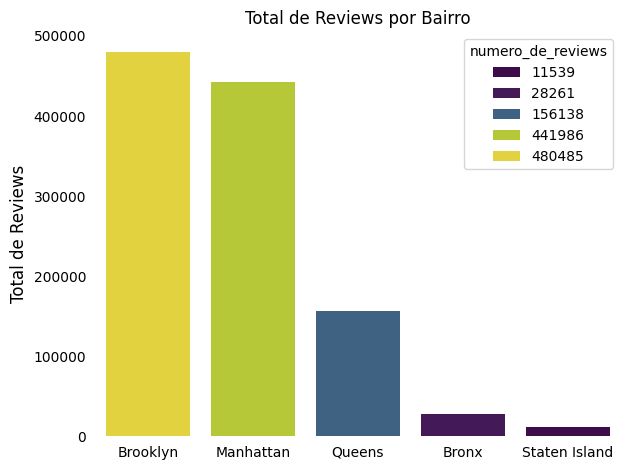

In [96]:
# Calculando a quantidade total de reviews por bairro
reviews_by_bairro = df_clean.groupby('bairro_group')['numero_de_reviews'].sum().sort_values(ascending=False)

# Exibindo os resultados
print("Total de Reviews por Bairro:")
print(reviews_by_bairro)
print('\n')

# Plotando a quantidade de reviews por bairro
ax = sns.barplot(x=reviews_by_bairro.index, y=reviews_by_bairro, hue=reviews_by_bairro, palette='viridis')
ax.set_title('Total de Reviews por Bairro')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('Total de Reviews', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

O Brooklyn lidera a quantidade de review, seguido por Manhattan.

Média de Reviews por Bairro para 'Entire home/apt':
bairro_group
Staten Island    34.857143
Bronx            31.620219
Queens           29.247938
Brooklyn         28.430384
Manhattan        18.302981
Name: numero_de_reviews, dtype: float64




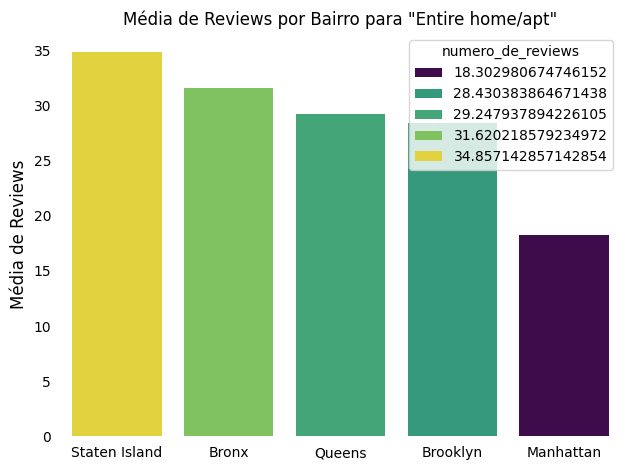

In [97]:
# Calculando a média de reviews por bairro para o tipo 'Entire home/apt'
reviews_entire_home_apt = df_clean[df_clean['room_type'] == 'Entire home/apt'].groupby('bairro_group')['numero_de_reviews'].mean().sort_values(ascending=False)

# Exibindo os resultados
print("Média de Reviews por Bairro para 'Entire home/apt':")
print(reviews_entire_home_apt)
print('\n')

# Plotando a média de reviews por bairro para 'Entire home/apt'
ax = sns.barplot(x=reviews_entire_home_apt.index, y=reviews_entire_home_apt, hue=reviews_entire_home_apt, palette='viridis')
ax.set_title('Média de Reviews por Bairro para "Entire home/apt"')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('Média de Reviews', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

Já quando analizamos a média a ordem dos grupos de bairros quase se inverte por completo.

Após toda a análise, posso concluir que o apartamento indicado para alugar na plataforma depende do budget do cliente, caso deseje um local mais caro e com maior porcentagem de reviews, o indicado será no grupo de bairros de Manhattan ou Brooklyn. Em outro cenário em que o budget do cliente seja menor, ele pode optar por alugar um apartemento no Bronx, Queens ou Staten Island.

### **O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

In [98]:
# Estatísticas descritivas
df_clean[['price', 'minimo_noites', 'disponibilidade_365']].describe()

,price,minimo_noites,disponibilidade_365
count,47124.000000,47124.000000,47124.000000
mean,131.499448,5.566845,110.179951
std,88.049556,8.184390,130.599931
min,10.000000,1.000000,0.000000
25%,68.000000,1.000000,0.000000
50%,100.000000,2.000000,41.000000
75%,172.000000,5.000000,219.000000
max,500.000000,30.000000,365.000000


                        price  minimo_noites  disponibilidade_365
price                1.000000       0.054700             0.093183
minimo_noites        0.054700       1.000000             0.242118
disponibilidade_365  0.093183       0.242118             1.000000


<Axes: >

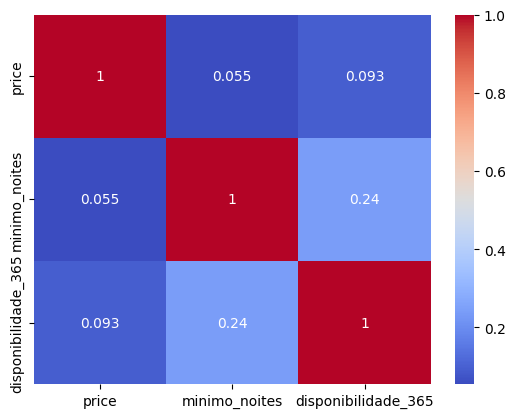

In [99]:
# Correlação
correlation_matrix = df_clean[['price', 'minimo_noites', 'disponibilidade_365']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Após a análise da matrix de correlação podemos inferir que o número mínimo de noites e a disponibilidade ao longo do ano não interferem no preço.

###**Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

Para essa análise vamos criar nuvens de palavras para comparar os nomes de locais classificados como mais caros e menos caros com base no preço. A nuvem de palavras destaca as palavras mais frequentes, permitindo identificar padrões que podem estar associados a locais de valores diferentes.

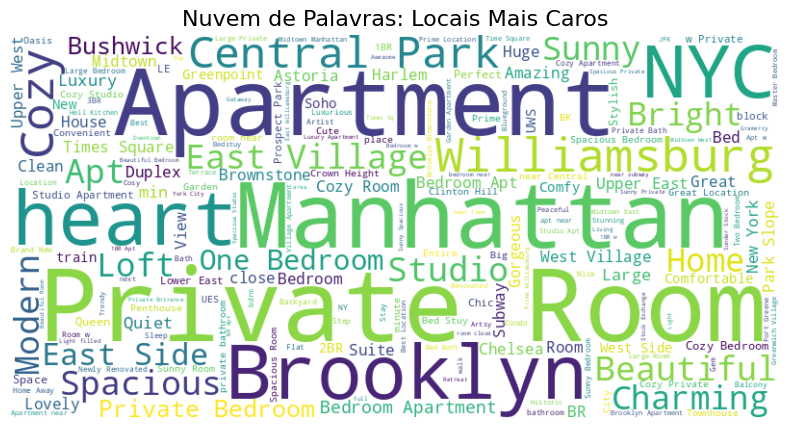

In [100]:
# Filtrar os anúncios com preços no topo 10% mais caros
top_10_percentile = df_clean['price'].quantile(0.1)
anuncios_caros = df_clean[df_clean['price'] >= top_10_percentile]

# Combinar os nomes dos locais em uma única string
texto_top = " ".join(anuncios_caros['nome'].dropna().astype(str))

# Configurar palavras a serem ignoradas (stopwords)
stopwords = set(STOPWORDS)

# Criar a nuvem de palavras para os locais mais caros
wordcloud_top = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords,
    colormap="viridis"
).generate(texto_top)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras: Locais Mais Caros", fontsize=16)
plt.show()


Vamos visualizar as palavras mais comuns nos anúncios com preços no top 10%. Removendo algumas palavras que não são úteis para a nossa análise, utilizando stopwords personalizadas.

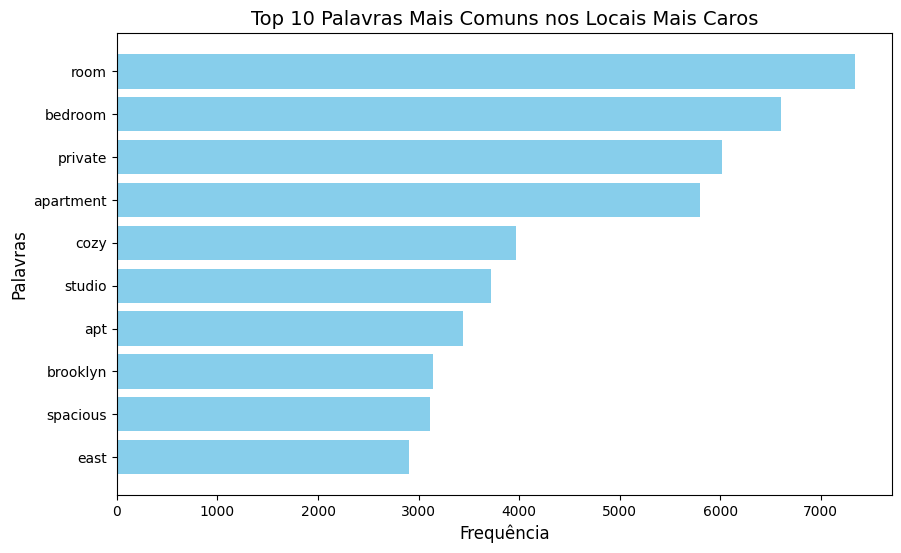

In [101]:
# Filtrar os anúncios com preços no topo 10% mais caros
top_50_percentile = df['price'].quantile(0.1)
anuncios_caros = df[df['price'] >= top_50_percentile]

# Combinar os nomes dos locais em uma única string
texto_top = " ".join(anuncios_caros['nome'].dropna().astype(str))

# Remover as stopwords personalizadas
custom_stopwords = set(STOPWORDS).union({
    'in', 'at', '1', '2', 'to', 'the', 'a', 'of', 'and', 'for', 'on', 'with', 'from', 'by', 'for', 'is', 'an', 'it', 'as', 'this', 'that', 'are', 'we'
})

# Criar uma lista com as palavras do texto
palavras = [word.lower() for word in texto_top.split() if word.lower() not in custom_stopwords]

# Contar a frequência das palavras
contagem_palavras = Counter(palavras)

# Obter as 10 palavras mais comuns
mais_comuns = contagem_palavras.most_common(10)

# Separar as palavras e suas contagens
palavras_comuns = [item[0] for item in mais_comuns]
frequencias = [item[1] for item in mais_comuns]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palavras_comuns, frequencias, color='skyblue')
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Palavras', fontsize=12)
plt.title('Top 10 Palavras Mais Comuns nos Locais Mais Caros', fontsize=14)
plt.gca().invert_yaxis()  # Inverter o eixo y para que a palavra mais comum apareça no topo
plt.show()

Essa análise nos permitiu identificar as palavras mais comuns nos anúncios mais caros (topo 10%) e que existe um padrão no texto do nome do local. Através da análise detalhada desses nomes, é possível identificar um contexto geral do estilo de cada anúncio, mas isso demandaria uma análise individual para cada anúncio. Considerando o tempo disponível, não é viável aplicar aqui.

## **Modelo de previsão do preço**

###**Explique como você faria a previsão do preço a partir dos dados.**

**Quais variáveis e/ou suas transformações você utilizou e por quê?**

Escolha de variáveis (features)
As variáveis foram selecionadas com base em sua relevância para o preço:

`bairro_group` e `bairro`: Influenciam o preço por refletirem localização e demanda.\
`room_type`: Determina o tipo de acomodação (ex.: casa inteira vs. quarto compartilhado).\
`minimo_noites`: Pode influenciar preços baseados em períodos de estadia mínima.\
`disponibilidade_365`: Um imóvel mais disponível pode ser mais barato ou caro dependendo do mercado.

**Qual tipo de problema estamos resolvendo (regressão, classificação)?**

Esse é um problema de regressão, pois estamos tentando prever um valor numérico contínuo, que neste caso é o preço do anúncio (price).

**Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

Como estamos lidando com um problema de regressão, eu testarei diferentes algoritmos, ajustando-os conforme a performance:

Modelos propostos:

**Árvores de Decisão ou Random Forest**

Prós: Capturam relações não-lineares, são robustos a outliers e interações complexas.\
Contras: Random Forest pode ser mais lento para grandes conjuntos de dados.

**Gradient Boosting Regressor**

Prós: Muito eficaz para problemas tabulares, ótimo desempenho em regressão.\
Contras: Mais difícil de interpretar, exige cuidado com tuning de hiperparâmetros.

**Regressão Linear**

Prós: Fácil de interpretar, rápido de treinar.\
Contras: Assume relações lineares, pode ser limitado em um problema com interações complexas.

**Qual medida de performance do modelo foi escolhida e por quê?**

Temos essas métricas de avaliação apropriada para problemas de regressão:

RMSE (Root Mean Squared Error): Mede a diferença entre os valores reais e previstos. Penaliza erros maiores, o que é útil para capturar desvios significativos no preço.
MAE (Mean Absolute Error): Pode ser útil como complemento, pois é menos sensível a outliers.

Erei utilizar o RMSE pois é o mais apropriado para a questão solicitada.

Modelo Árvores de Decisão ou Random Forest

In [122]:
# Seleção de Features Relevantes
features_relevantes = [
    "bairro_group", "bairro", "latitude", "longitude", "room_type",
    "minimo_noites", "numero_de_reviews",
    "calculado_host_listings_count", "disponibilidade_365"
]
target = "price"  # Variável de saída

# Separando as features e o target
X = df_clean[features_relevantes]
y = df_clean[target]

In [123]:
# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do pipeline de pré-processamento e modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['minimo_noites', 'numero_de_reviews',
                                   'calculado_host_listings_count', 'disponibilidade_365',
                                   'latitude', 'longitude']),
        ('cat',  OneHotEncoder(handle_unknown='ignore'), ['bairro_group', 'bairro', 'room_type'])
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])
# Treinamento do modelo
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE do modelo: {rmse:.2f}")

RMSE do modelo: 62.30


In [124]:
# Previsão com o exemplo fornecido
novo_apartamento = {
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355],

}
novo_apartamento_df = pd.DataFrame(novo_apartamento)
preco_previsto = model.predict(novo_apartamento_df)
print(f"Preço sugerido para o apartamento: ${preco_previsto[0]:.2f}")

Preço sugerido para o apartamento: $242.83


Modelo Gradient Boosting Regressor

In [125]:
# Separar as features e o target
X = df_clean[['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'minimo_noites',
          'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365']]
y = df_clean['price']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
                                   'calculado_host_listings_count', 'disponibilidade_365']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bairro_group', 'bairro', 'room_type'])
    ]
)

# Modelo Gradient Boosting
model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Previsões e avaliação
predictions = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE do modelo Gradient Boosting: {rmse:.2f}")

RMSE do modelo Gradient Boosting: 63.48


In [126]:
# Exemplo de previsão com novos dados
apartamento_novo = {
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355],

}
new_df = pd.DataFrame(apartamento_novo)
new_prediction = pipeline.predict(new_df)
print(f"Preço sugerido para o novo apartamento: ${new_prediction[0]:.2f}")


Preço sugerido para o novo apartamento: $242.73


Quando se compara o desempenho de dois modelos, o Random Forest e o Gradient Boosting, o critério de escolha geralmente depende da métrica de desempenho, no caso o RMSE (Root Mean Squared Error).

Analisando os resultados:

Random Forest: RMSE = 62.30\
Gradient Boosting: RMSE = 63.48

O Random Forest tem um RMSE ligeiramente menor, o que indica que ele está prevendo com mais precisão do que o Gradient Boosting nesse caso específico. Portanto, com base apenas no RMSE, o Random Forest seria a escolha preferível.

Supondo um apartamento com as seguintes características:

{\
  'id': 2595,\
  'nome': 'Skylit Midtown Castle',\
  'host_id': 2845,\
  'host_name': 'Jennifer',\
  'bairro_group': 'Manhattan',\
  'bairro': 'Midtown',\
  'latitude': 40.75362,\
  'longitude': -73.98377,\
  'room_type': 'Entire home/apt',\
  'minimo_noites': 1,\
  'numero_de_reviews': 45,\
  'ultima_review': '2019-05-21',\
  'reviews_por_mes': 0.38,\
  'calculado_host_listings_count': 2,\
  'disponibilidade_365': 355\
}

**Qual seria a sua sugestão de preço?**

Após a aplicação das características aplicadas no modelo Random forest o valor sugerido para o apartamento é de $242.83.

**Exportação do modelo para um arquivo pickle**

In [127]:
# Salvando o modelo em formato .pkl
joblib.dump(model, 'modelo_precos_indicium.pkl')

['modelo_precos_indicium.pkl']